In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Read csv file into data frame.

In [2]:
Profraw <- read.csv("NeSAProficiency.csv")

Filter out Native Hawaiian and Two or More Races fields as there are less than 10 in the state so that field is masked (throws an error if you don't filter).

In [3]:
Proficiency <- Profraw %>% filter(RACE_ETHNICITY!="Native Hawaiian or Other Pacific Islander", RACE_ETHNICITY!="Two Or More Races") 

Create another column for Proficiency Percentage and turn the column into raw numbers not alpha characters like Percent_Proficient column is.

In [4]:
Proficiency$ProfPerc <- as.numeric(as.character(Proficiency$PERCENT_PROFICIENT))

Read data head.

In [5]:
head(Proficiency)

DATAYEARS,SUBJECT_DESCRIPTION,RACE_ETHNICITY,GENDER,FRL,PERCENT_PROFICIENT,ProfPerc
910,READING,American Indian or Alaska Native,MALE,FRL,35.97,35.97
1011,READING,American Indian or Alaska Native,MALE,FRL,38.17,38.17
1112,READING,American Indian or Alaska Native,MALE,FRL,38.64,38.64
1213,READING,American Indian or Alaska Native,MALE,FRL,41.45,41.45
1314,READING,American Indian or Alaska Native,MALE,FRL,44.82,44.82
1415,READING,American Indian or Alaska Native,MALE,FRL,46.46,46.46


Filter gender males and suject reading only.

In [6]:
profracefemales <- Proficiency %>%
  filter(GENDER == "FEMALE", SUBJECT_DESCRIPTION == "READING" ) 

Plot line graph of males by race, free and reduced lunch vs not free and reduced lunch, with the x as the data year and the y as the proficiency percentage. Do a facet wrap to include a separate line graph for each race. Set width and height of each graph to 10x10.

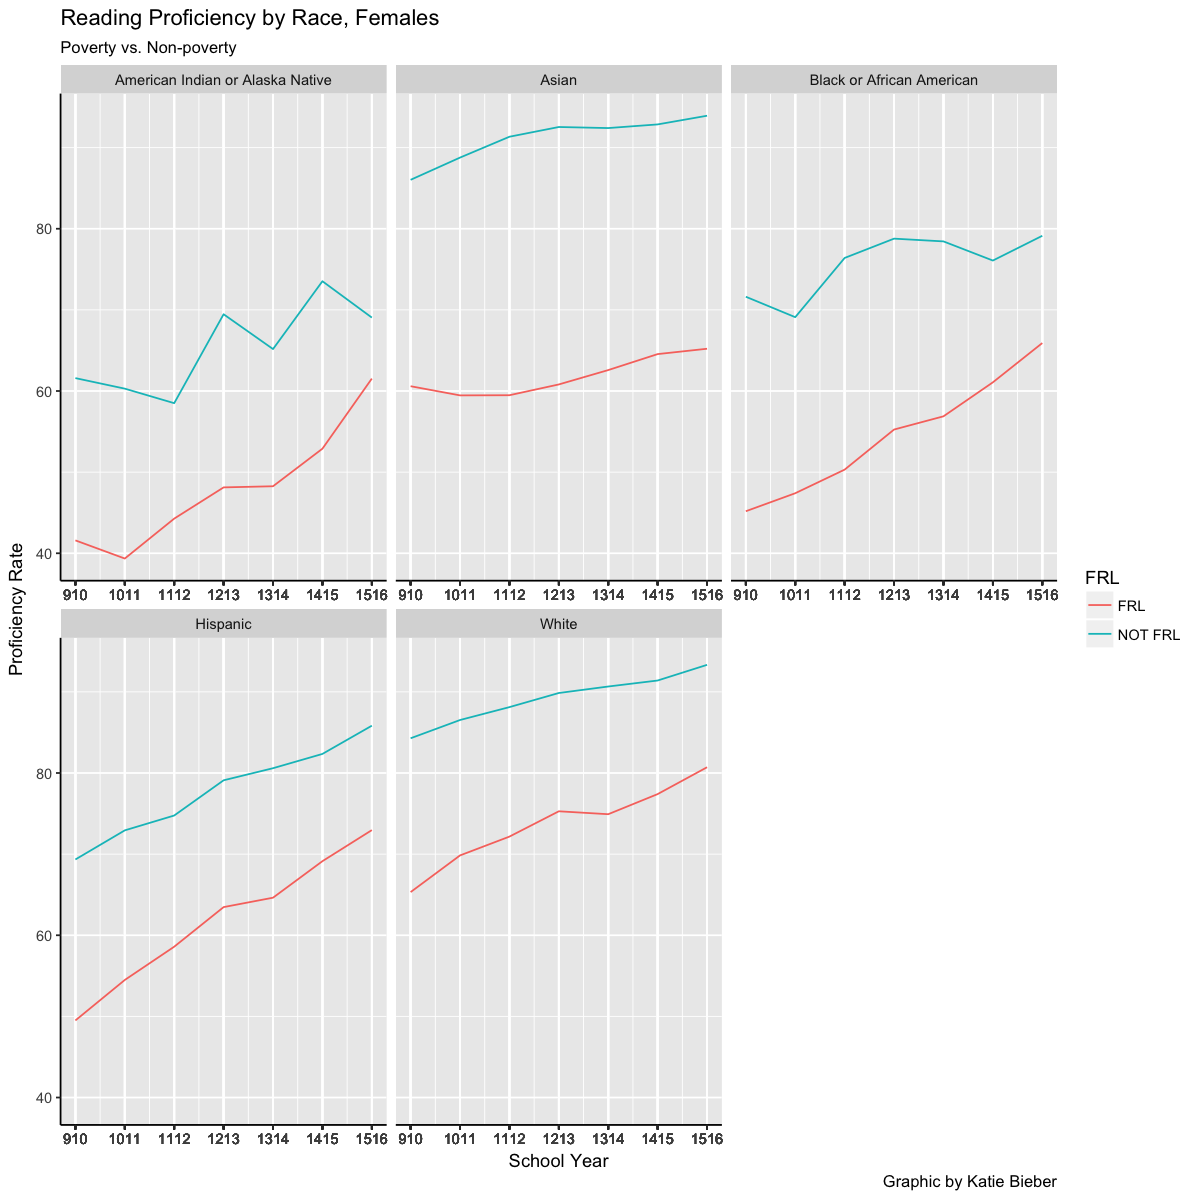

In [7]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data=profracefemales, aes(x=DATAYEARS, y=ProfPerc, group=FRL, color=FRL)) + geom_line() + labs(x="School Year", y="Proficiency Rate", title="Reading Proficiency by Race, Females", subtitle="Poverty vs. Non-poverty", caption="Graphic by Katie Bieber") + facet_wrap(~RACE_ETHNICITY, scales='free_x') + theme(axis.line=element_line()) + scale_x_continuous(labels=as.character(profracefemales$DATAYEARS),breaks=profracefemales$DATAYEARS)

Export file as pdf set with same 10x10 width and height.

In [8]:
ggsave("profracefemalesreading.pdf", width=10, height=10)